In [1]:
#Importing necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas_datareader as pdr 
import datetime as dt
import numpy as np
# import pylab
import seaborn as sns
# import plotly.offline as pyo
# import plotly.graph_objs as go
# from plotly import tools
import calendar as cdr
from scipy.stats import norm
%matplotlib inline
# pyo.init_notebook_mode(connected = True)
# pd.options.plotting.backend = 'plotly'



In [2]:
# reading the csv file and defining its variable


cab_data = pd.read_csv('Cab_Data.csv')
city_data = pd.read_csv('City.csv')
cus_id_data = pd.read_csv('Customer_ID.csv')
transc_id_data = pd.read_csv('Transaction_ID.csv')

# DATA CLEANING AND MINING

In [3]:
# calling the first 5 rows on the dataset

cab_data.head(5)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
city_data.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
#cab_data.merge(city_data, on='City', how = 'left')

In [6]:
cus_id_data.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
transc_id_data.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:
# merging the transac_id_data and cus_id_data dataset using the Customer ID as the key



on_cus_id = pd.merge(transc_id_data,cus_id_data, on='Customer ID' )


In [9]:
# merging the on_cus_id with the cab_data using the Transaction_ID 

full_data = pd.merge(on_cus_id,cab_data, on = 'Transaction ID')

full_data.head(5)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


In [10]:
# checking for duplicate values

full_data.duplicated().sum()

0

In [11]:
# chcking for nan values

full_data.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
dtype: int64

In [12]:
# understanding the data type of each features in the full_data and city_data


print(full_data.info())

print(city_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Gender              359392 non-null  object 
 4   Age                 359392 non-null  int64  
 5   Income (USD/Month)  359392 non-null  int64  
 6   Date of Travel      359392 non-null  int64  
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 35.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      No

In [13]:
# changing data type of from string to integers

city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)

city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)



# changing the date of travel column from string to date object

full_data['Date of Travel'] = pd.to_datetime(full_data['Date of Travel'], unit= 'D', origin = '1899-12-30  20:00:00')

#full_data.set_index('Date of Travel', inplace = True)

In [14]:
# confirming the Date of travel column is a datetime object

full_data['Date of Travel']


0        2016-01-08
1        2018-07-21
2        2018-11-23
3        2016-01-06
4        2018-04-21
            ...    
359387   2018-01-07
359388   2018-01-03
359389   2018-01-04
359390   2018-01-06
359391   2018-01-04
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

In [15]:
# spliting the Date of Travel column into year, day, dayofweek, month and weekday and creating a columnn for each


year = []

day = []

dayofweek = []

month = []

weekday =[]


for x in full_data['Date of Travel']:
    year.append(x.year)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(cdr.day_name[dayofweek[-1]])
    
    




full_data['year'] = year

full_data['Day'] = day

full_data['Month'] = month


full_data['Weekday'] = weekday


full_data['mdate'] = full_data['Date of Travel'].dt.to_period('M')

In [16]:
# Creating a month column

full_data['Month'] = full_data['Month'].apply(lambda x:cdr.month_abbr[x])

In [17]:
# reading in the full_data to confirm the new columns

full_data.head(5)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,year,Day,Month,Weekday,mdate
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,8,Jan,Friday,2016-01
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,21,Jul,Saturday,2018-07
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,23,Nov,Friday,2018-11
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,6,Jan,Wednesday,2016-01
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,21,Apr,Saturday,2018-04


In [18]:
# set the Date of Travel as index, in order to plot a timeseries graph later in the analysis


#full_data.set_index('Date of Travel', inplace= True)


## Exploratory Data Analysis

Spliting the Data into Categorical and Numerical variables and analyzing both variables to get more insight from the data

## CATEGORICAL VARIABLES

#### Analysis:

- Total population per Gender
- Population per city and per Gender 
- Population in each city and Type of Cab frequently ordered
- Payment mode per Gender
- Payment mode per Company(Cab_Type)
- Frequency of Cab-Type(Company) by Gender
- Frequency of Cab-Type(Company) by Weekday
- Frequency of Cab-Type(Company) by Month

In [19]:
full_data.columns

features_cat = ['Gender','Company', 'City', 'Weekday', 'Payment_Mode', 'Month']

list(enumerate(features_cat))

[(0, 'Gender'),
 (1, 'Company'),
 (2, 'City'),
 (3, 'Weekday'),
 (4, 'Payment_Mode'),
 (5, 'Month')]

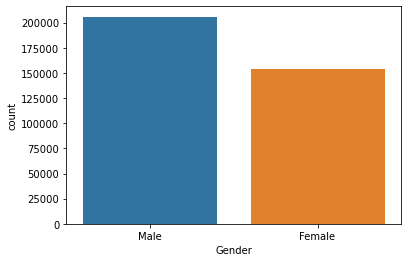

Male      205912
Female    153480
Name: Gender, dtype: int64


In [20]:
sns.countplot(x='Gender', data = full_data)

plt.show()
print(full_data["Gender"].value_counts())

#full_data["Gender"].sum()

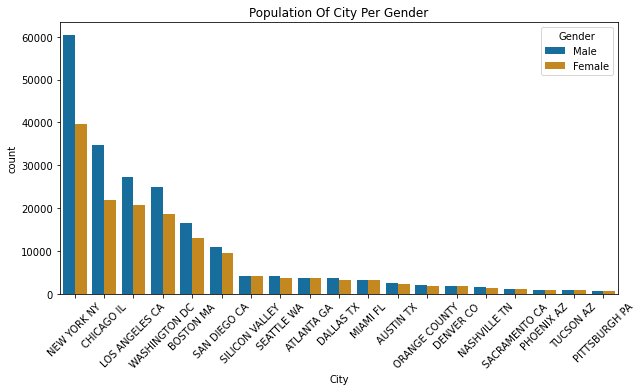

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
Name: City, dtype: int64


In [21]:
plt.figure(figsize=(10,5))

sns.countplot(x='City', data = full_data, palette = 'colorblind', hue= 'Gender',  
              order = full_data['City'].value_counts().index)


plt.title('Population Of City Per Gender')

plt.xticks(rotation = 45)

plt.show();

print(full_data["City"].value_counts().head(10))

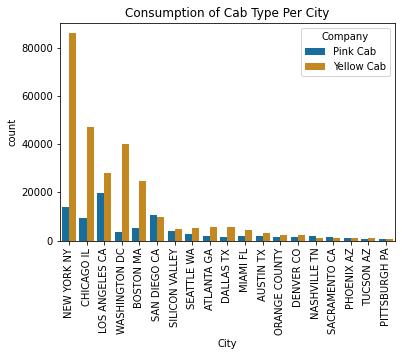

In [22]:
sns.countplot(x='City', data = full_data, palette = 'colorblind', hue= 'Company',  
              order = full_data['City'].value_counts().index)

plt.xticks(rotation = 90)


plt.title('Consumption of Cab Type Per City')

# plt.figure(figsize=(15,10))

plt.show();



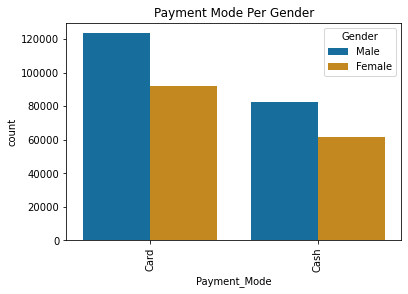

In [23]:
sns.countplot(x='Payment_Mode', data = full_data, palette = 'colorblind', hue= 'Gender', linewidth = 3, 
              order = full_data['Payment_Mode'].value_counts().index)



plt.title('Payment Mode Per Gender')

plt.xticks(rotation = 90);


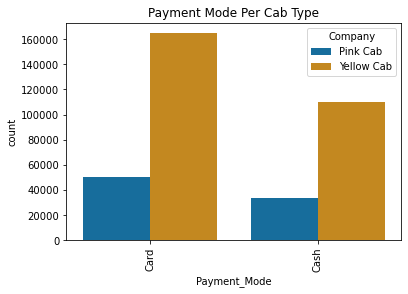

In [24]:
sns.countplot(x='Payment_Mode', data = full_data, palette = 'colorblind', hue= 'Company', linewidth = 3, 
              order = full_data['Payment_Mode'].value_counts().index)

plt.title('Payment Mode Per Cab Type')

plt.xticks(rotation = 90);


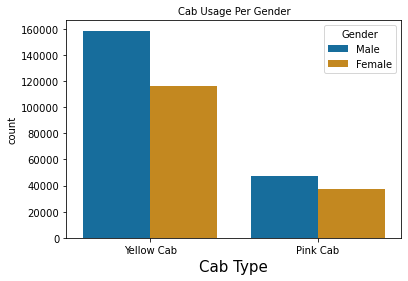

In [25]:
sns.countplot(x='Company', data = full_data, palette = 'colorblind', linewidth = 3,hue ='Gender' ,
              order = full_data['Company'].value_counts().index)

plt.title('Cab Usage Per Gender', {'size' :10})

plt.xlabel('Cab Type', {'size' :15})


plt.show();


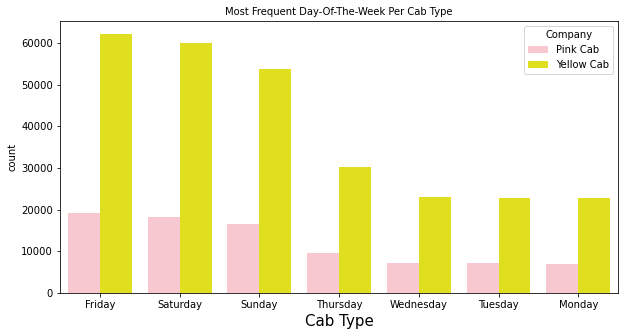

In [26]:

plt.figure(figsize=(10,5))

sns.countplot(x='Weekday', data = full_data, linewidth = 3,hue ='Company' ,
              order = full_data['Weekday'].value_counts().index, palette=['#FFC0CB',
'#FFFF00'])


plt.title('Most Frequent Day-Of-The-Week Per Cab Type', {'size' :10})

plt.xlabel('Cab Type', {'size' :15})



plt.show();


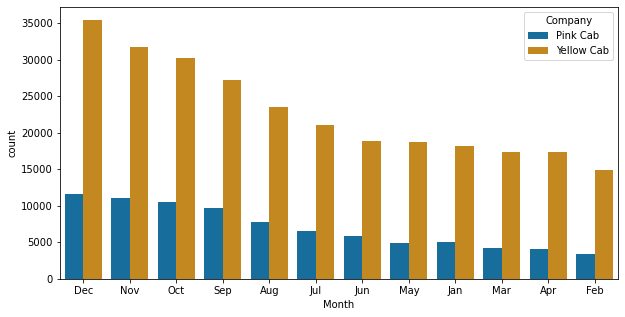

In [27]:
plt.figure(figsize=(10,5))


sns.countplot(x='Month', data = full_data, palette = 'colorblind', linewidth = 3,hue ='Company' ,
              order = full_data['Month'].value_counts().index)




plt.show();


## NUMERICAL VARIABLES

- Outliers and relationship 
- Distribution function


In [28]:
full_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
Customer ID,359392.0,1.919165e+04,21012.412463,1.0,2.705000e+03,7459.00,3.607800e+04,60000.00
Age,359392.0,3.533670e+01,12.594234,18.0,2.500000e+01,33.00,4.200000e+01,65.00
Income (USD/Month),359392.0,1.504882e+04,7969.409482,2000.0,8.424000e+03,14685.00,2.103500e+04,35000.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20
year,359392.0,2.017045e+03,0.800239,2016.0,2.016000e+03,2017.00,2.018000e+03,2018.00
Day,359392.0,1.562845e+01,8.827151,1.0,8.000000e+00,16.00,2.300000e+01,31.00


In [29]:
full_data.columns

features_num = ['Income (USD/Month)', 'KM Travelled',
       'Price Charged', 'Cost of Trip']

list(enumerate(features_num))

[(0, 'Income (USD/Month)'),
 (1, 'KM Travelled'),
 (2, 'Price Charged'),
 (3, 'Cost of Trip')]

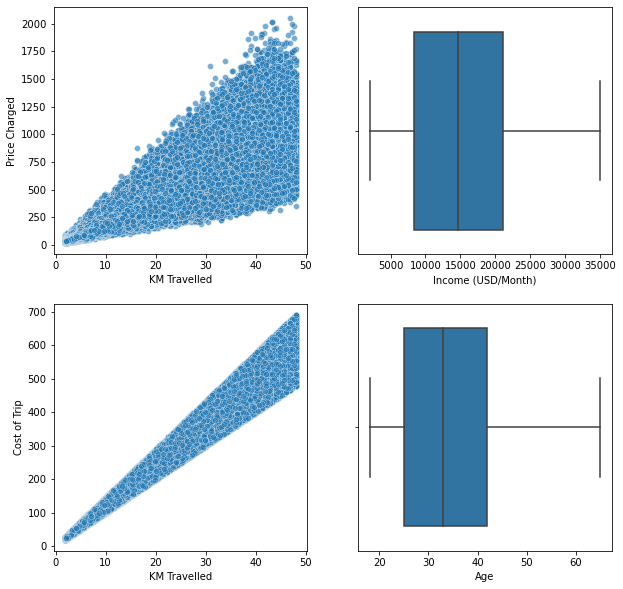

In [30]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.scatterplot(x=full_data['KM Travelled'], y= full_data['Price Charged'], alpha = 0.6)

plt.subplot(2,2,2)
sns.boxplot(x=full_data['Income (USD/Month)'])


plt.subplot(2,2,3)
sns.scatterplot(x=full_data['KM Travelled'], y= full_data['Cost of Trip'], alpha = 0.5);

plt.subplot(2,2,4)
sns.boxplot(x=full_data['Age']);


In [31]:
# Creating a new column named Income_Group to group the population based on their Income bracket


# https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system


Income_Group = []

for i in full_data['Income (USD/Month)']:
    if i < (52200/12) :
        Income_Group.append('Low Class')
    
    elif i >= (52200/12) or i < (156600/12):
        Income_Group.append('Middle Class')
    
    elif i > (156600/12):
        Income_Group.append('Upper class')
        
        
full_data['Income_Group'] = Income_Group


full_data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,year,Day,Month,Weekday,mdate,Income_Group
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,8,Jan,Friday,2016-01,Middle Class
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,21,Jul,Saturday,2018-07,Middle Class
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,23,Nov,Friday,2018-11,Middle Class
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,6,Jan,Wednesday,2016-01,Middle Class
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,21,Apr,Saturday,2018-04,Middle Class


<Figure size 720x360 with 0 Axes>

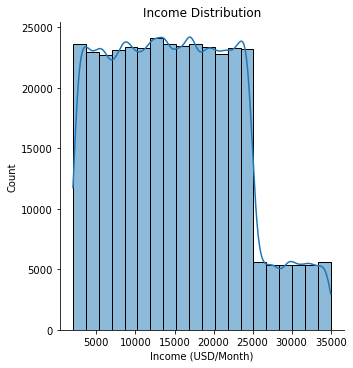

The minimum income in the distribution is : 2000
The average income in the distribution is : 15048.822937071498
The maximum income in the distribution is : 35000
The median income in the distribution is : 14685.0
The mode income in the distribution is : 0    20884
dtype: int64


In [32]:
plt.figure(figsize = (10,5))

sns.displot(full_data['Income (USD/Month)'], kde=True, bins=20);


#fig.(full_data['Income (USD/Month)'].mean(), color='r', linestyle='--', label="Mean")

plt.title('Income Distribution')

plt.show();

print("The minimum income in the distribution is :",  full_data['Income (USD/Month)'].min())
print("The average income in the distribution is :", full_data['Income (USD/Month)'].mean())
print("The maximum income in the distribution is :", full_data['Income (USD/Month)'].max())
print("The median income in the distribution is :", full_data['Income (USD/Month)'].median())
print("The mode income in the distribution is :", full_data['Income (USD/Month)'].mode())




Middle Class    325699
Low Class        33693
Name: Income_Group, dtype: int64


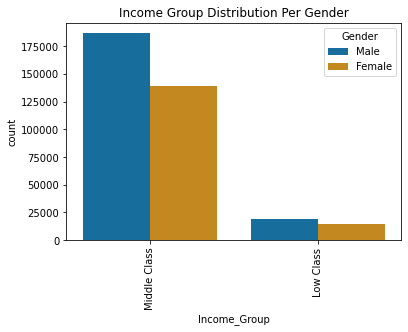

In [33]:
sns.countplot(x='Income_Group', data = full_data, palette = 'colorblind', hue= 'Gender', linewidth = 3, 
              order = full_data['Income_Group'].value_counts().index).set_title('Income Group Distribution Per Gender')

plt.xticks(rotation = 90)


print(full_data['Income_Group'].value_counts());



The minimum price in the distribution is : 15.6
The average price in the distribution is : 423.44331125901783
The maximum price in the distribution is : 2048.03
The median price in the distribution is : 386.36


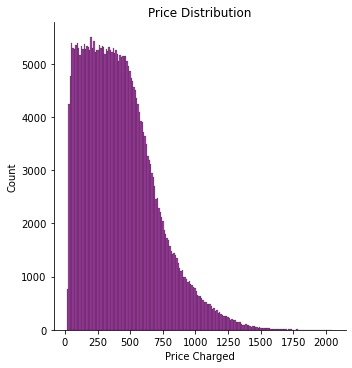

In [34]:
sns.displot(data=full_data['Price Charged'], color='purple' )


plt.title('Price Distribution')

print("The minimum price in the distribution is :",  full_data['Price Charged'].min())
print("The average price in the distribution is :", full_data['Price Charged'].mean())
print("The maximum price in the distribution is :", full_data['Price Charged'].max())
print("The median price in the distribution is :", full_data['Price Charged'].median());

The minimum cost for a trip in the distribution is : 19.0
The average cost for a trip in the distribution is : 286.1901128244184
The maximum cost for a trip in the distribution is : 691.2
The median cost for a trip in the distribution is : 282.48


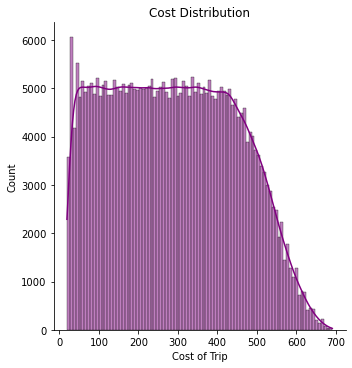

In [35]:
sns.displot(data=full_data['Cost of Trip'], color='purple', kde=True )

plt.title('Cost Distribution')

print("The minimum cost for a trip in the distribution is :",  full_data['Cost of Trip'].min())
print("The average cost for a trip in the distribution is :", full_data['Cost of Trip'].mean())
print("The maximum cost for a trip in the distribution is :", full_data['Cost of Trip'].max())
print("The median cost for a trip in the distribution is :", full_data['Cost of Trip'].median());




In [36]:
full_data['Profit']= full_data['Price Charged'] - full_data['Cost of Trip']

full_data['Profit/Km'] = full_data['Profit'] / full_data['KM Travelled']

full_data.head(5)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,year,Day,Month,Weekday,mdate,Income_Group,Profit,Profit/Km
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,8,Jan,Friday,2016-01,Middle Class,57.3150,1.882266
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,21,Jul,Saturday,2018-07,Middle Class,281.2772,10.739870
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,23,Nov,Friday,2018-11,Middle Class,194.6480,4.574571
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,6,Jan,Wednesday,2016-01,Middle Class,23.6660,0.826904
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,21,Apr,Saturday,2018-04,Middle Class,253.9808,6.981330


The minimum profit/km in the distribution is : -4.998235294117647
The average profit/km in the distribution is : 6.083579048822811
The maximum profit/km in the distribution is : 41.11555555555556
The median profit/km in the distribution is : 4.466808891507297


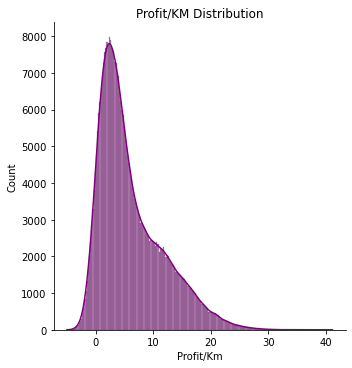

In [37]:
sns.displot(data=full_data['Profit/Km'], color='purple', kde=True )

plt.title('Profit/KM Distribution')

print("The minimum profit/km in the distribution is :",  full_data['Profit/Km'].min())
print("The average profit/km in the distribution is :", full_data['Profit/Km'].mean())
print("The maximum profit/km in the distribution is :", full_data['Profit/Km'].max())
print("The median profit/km in the distribution is :", full_data['Profit/Km'].median());



The minimum age in the distribution is : 18
The average age in the distribution is : 35.33670476805271
The maximum age in the distribution is : 65
The median age in the distribution is : 33.0


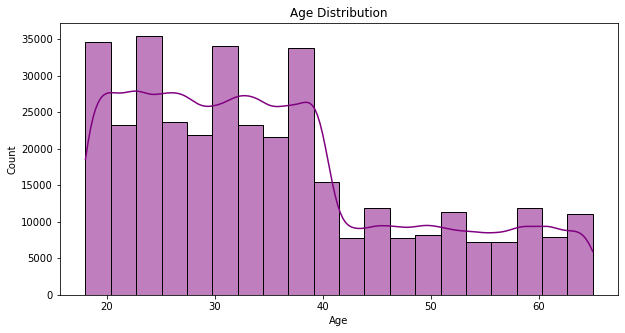

In [38]:
plt.figure(figsize=(10,5))



sns.histplot(data=full_data['Age'], color='purple' , kde= True, bins =20)


plt.title('Age Distribution')

print("The minimum age in the distribution is :",  full_data['Age'].min())
print("The average age in the distribution is :", full_data['Age'].mean())
print("The maximum age in the distribution is :", full_data['Age'].max())
print("The median age in the distribution is :", full_data['Age'].median());

In [39]:
city_data['Pop/Users'] = city_data['Population']/city_data['Users']

city_data.sort_values(by=['Pop/Users'], ascending =False, inplace = True)

city_data.reset_index(drop=True,inplace= True)

city_data.head(5)

,City,Population,Users,Pop/Users
0,PHOENIX AZ,943999,6133,153.921246
1,PITTSBURGH PA,542085,3643,148.801812
2,TUCSON AZ,631442,5712,110.546569
3,ORANGE COUNTY,1030185,12994,79.281592
4,SACRAMENTO CA,545776,7044,77.480977


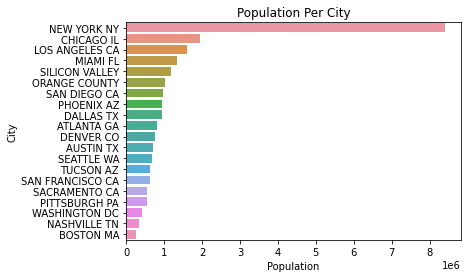

In [40]:
city_data.sort_values(by=['Population'], ascending =False, inplace = True)

sns.barplot(x='Population', y='City', data=city_data).set_title('Population Per City');

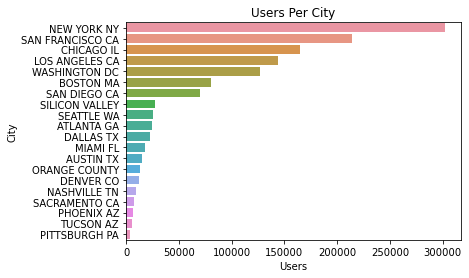

In [41]:
city_data.sort_values(by=['Users'], ascending =False, inplace = True)

sns.barplot(x='Users', y='City', data=city_data).set_title('Users Per City');

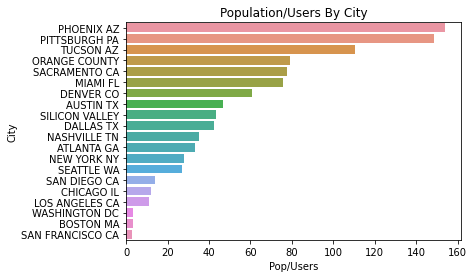

In [42]:
city_data.sort_values(by=['Pop/Users'], ascending =False, inplace = True)

sns.barplot(x='Pop/Users', y='City', data=city_data).set_title('Population/Users By City');



###  MARKET AND SALES ANALYSIS

In [43]:
full_data_ana = full_data.drop(['year','Day', 'Month', 'Weekday','mdate'],axis=1)



In [44]:
full_data_ana.head(5)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Income_Group,Profit,Profit/Km
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Middle Class,57.3150,1.882266
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Middle Class,281.2772,10.739870
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Middle Class,194.6480,4.574571
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Middle Class,23.6660,0.826904
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Middle Class,253.9808,6.981330


In [45]:
def get_month(x) : 
    
    return dt.datetime(x.year, x.month, 1)

full_data_ana['TransMonth'] = full_data['Date of Travel'].apply(get_month)





grouping_cus = full_data_ana.groupby(['Customer ID'])['TransMonth']


full_data_ana['Cohort_month'] = grouping_cus.transform('min')

full_data_ana.head(5)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Income_Group,Profit,Profit/Km,TransMonth,Cohort_month
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Middle Class,57.3150,1.882266,2016-01-01,2016-01-01
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Middle Class,281.2772,10.739870,2018-07-01,2016-01-01
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Middle Class,194.6480,4.574571,2018-11-01,2016-01-01
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Middle Class,23.6660,0.826904,2016-01-01,2016-01-01
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Middle Class,253.9808,6.981330,2018-04-01,2016-01-01


In [46]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day


# trans_year, trans_month  = get_date_int(full_data_ana, 'TransMonth')

# cohort_year, cohort_month, _ = get_date_int(full_data_ana, 'Cohort_month')

In [47]:
trans_year, trans_month, _  = get_date_int(full_data_ana, 'TransMonth')

# cohort_year, cohort_month, _ = get_date_int(full_data_ana, 'Cohort_month')

In [48]:
cohort_year, cohort_month, _ = get_date_int(full_data_ana, 'Cohort_month')

In [49]:
year_diff = trans_year - cohort_year

year_diff.head(5)

0    0
1    2
2    2
3    0
4    2
dtype: int64

In [50]:
month_diff = trans_month - cohort_month

month_diff.head(5)

0     0
1     6
2    10
3     0
4     3
dtype: int64

In [51]:
year_diff * 12 + month_diff + 1

0          1
1         31
2         35
3          1
4         28
          ..
359387     1
359388     1
359389     1
359390     1
359391     1
Length: 359392, dtype: int64

In [52]:
full_data_ana['CohortIndex'] = year_diff * 12 + month_diff + 1


full_data_ana.head(5)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Income_Group,Profit,Profit/Km,TransMonth,Cohort_month,CohortIndex
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Middle Class,57.3150,1.882266,2016-01-01,2016-01-01,1
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Middle Class,281.2772,10.739870,2018-07-01,2016-01-01,31
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Middle Class,194.6480,4.574571,2018-11-01,2016-01-01,35
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Middle Class,23.6660,0.826904,2016-01-01,2016-01-01,1
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Middle Class,253.9808,6.981330,2018-04-01,2016-01-01,28


In [53]:
cohort_data = full_data_ana.groupby(
    ['Cohort_month', 'CohortIndex'])['Customer ID'].apply(pd.Series.nunique).reset_index()

In [54]:
cohort_count =cohort_data.pivot_table(index = 'Cohort_month',
                       columns = 'CohortIndex',
                       values = 'Customer ID')

cohort_count.head(5)

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
Cohort_month,,,,,,,,,,,,,,,,,,,,,
2016-01-01,4197.0,923.0,1034.0,1029.0,1148.0,1111.0,1343.0,1369.0,1492.0,1703.0,...,1186.0,1122.0,1184.0,1229.0,1326.0,1527.0,1631.0,1695.0,1867.0,1900.0
2016-02-01,4099.0,987.0,975.0,1145.0,1074.0,1285.0,1270.0,1447.0,1624.0,1576.0,...,1038.0,1162.0,1227.0,1224.0,1434.0,1536.0,1606.0,1765.0,1796.0,NaN
2016-03-01,3487.0,772.0,844.0,839.0,932.0,980.0,1100.0,1227.0,1240.0,1304.0,...,883.0,958.0,959.0,1081.0,1215.0,1173.0,1345.0,1388.0,NaN,NaN
2016-04-01,2908.0,621.0,641.0,674.0,697.0,812.0,855.0,914.0,922.0,666.0,...,703.0,740.0,784.0,886.0,924.0,969.0,982.0,NaN,NaN,NaN
2016-05-01,2560.0,470.0,550.0,553.0,629.0,679.0,704.0,739.0,511.0,416.0,...,562.0,631.0,671.0,746.0,807.0,818.0,NaN,NaN,NaN,NaN


In [55]:
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis =0)

retention.round(3).head(2)

CohortIndex,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
Cohort_month,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1.0,0.220,0.246,0.245,0.274,0.265,0.32,0.326,0.355,0.406,...,0.283,0.267,0.282,0.293,0.316,0.364,0.389,0.404,0.445,0.453
2016-02-01,1.0,0.241,0.238,0.279,0.262,0.313,0.31,0.353,0.396,0.384,...,0.253,0.283,0.299,0.299,0.350,0.375,0.392,0.431,0.438,NaN


In [56]:
cohort_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Cohort_month  666 non-null    datetime64[ns]
 1   CohortIndex   666 non-null    int64         
 2   Customer ID   666 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 15.7 KB


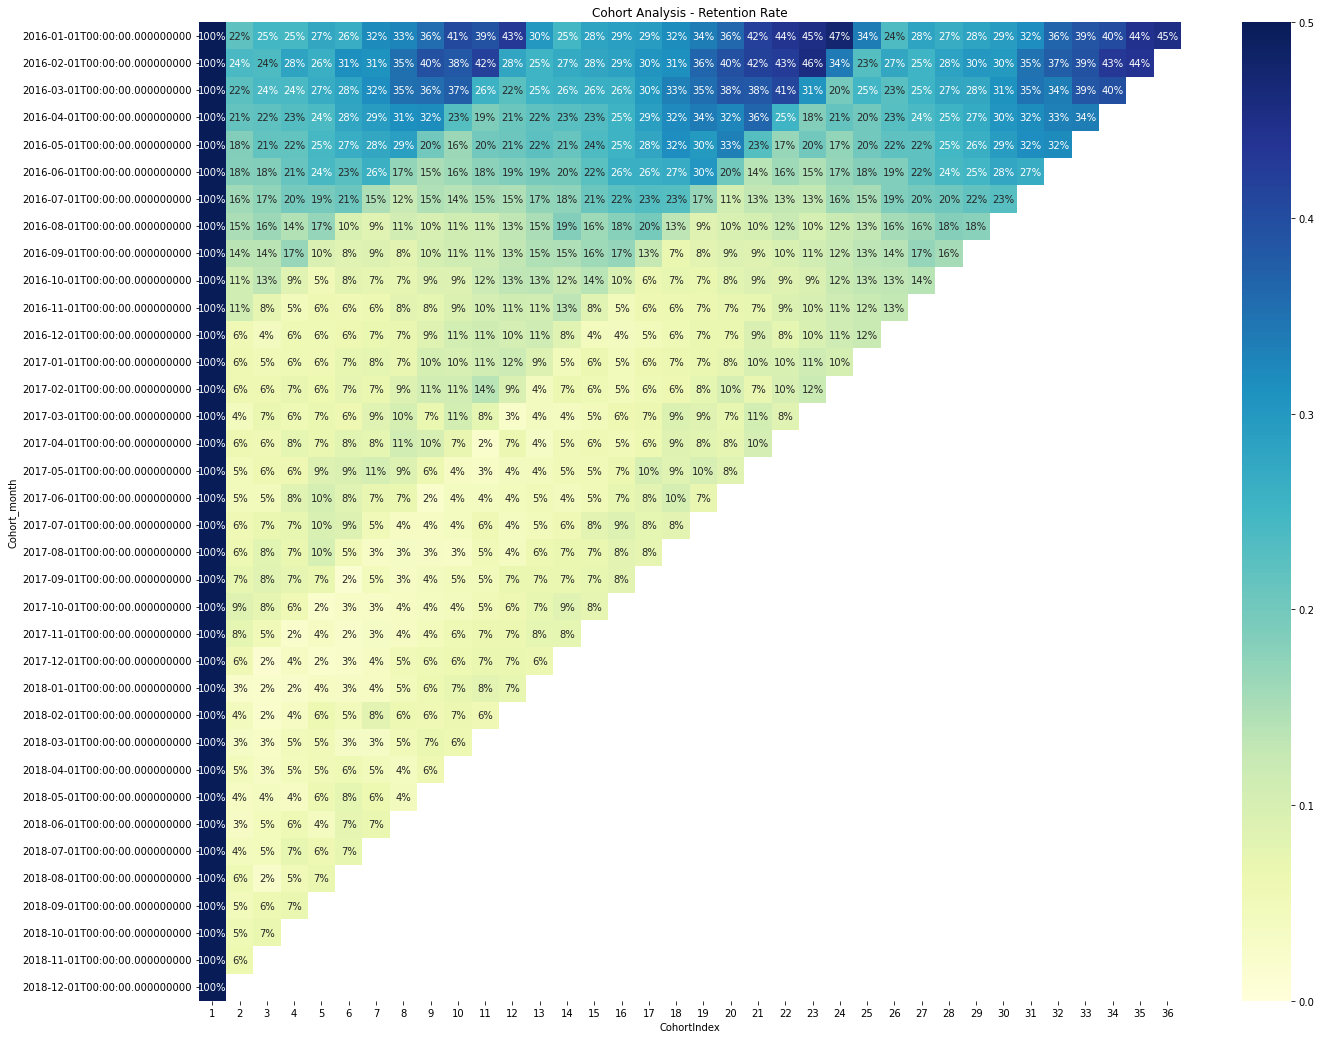

In [57]:
plt.figure(figsize= (22,18))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data =retention,
           annot = True,
           fmt= '.0%',
           vmin = 0.0,
           vmax= 0.5,
           cmap = 'YlGnBu')

plt.show()

## Financial Analysis

In [58]:
import re

In [59]:
pd.options.plotting.backend = 'plotly'

In [60]:
fin_analysis = full_data.drop(['Transaction ID','Customer ID','Payment_Mode','Gender','Age','Income (USD/Month)', 'City','KM Travelled','Price Charged','Cost of Trip','year','Day','Month','Weekday','Income_Group'], axis=1)


#fin_analysis.set_index('Date of Travel',inplace=True)


In [61]:
fin_analysis.head()

,Date of Travel,Company,mdate,Profit,Profit/Km
0,2016-01-08,Pink Cab,2016-01,57.3150,1.882266
1,2018-07-21,Yellow Cab,2018-07,281.2772,10.739870
2,2018-11-23,Yellow Cab,2018-11,194.6480,4.574571
3,2016-01-06,Pink Cab,2016-01,23.6660,0.826904
4,2018-04-21,Yellow Cab,2018-04,253.9808,6.981330


In [62]:
fin_analysis['mdate'] = fin_analysis['mdate'].astype(str)

In [63]:
fin_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date of Travel  359392 non-null  datetime64[ns]
 1   Company         359392 non-null  object        
 2   mdate           359392 non-null  object        
 3   Profit          359392 non-null  float64       
 4   Profit/Km       359392 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 24.5+ MB


In [64]:
fin_analysis['mdate'] = pd.to_datetime(fin_analysis['mdate'],format='%Y-%m').dt.strftime('%Y-%b')


In [65]:
fin_analysis['mdate']

0         2016-Jan
1         2018-Jul
2         2018-Nov
3         2016-Jan
4         2018-Apr
            ...   
359387    2018-Jan
359388    2018-Jan
359389    2018-Jan
359390    2018-Jan
359391    2018-Jan
Name: mdate, Length: 359392, dtype: object

In [66]:
yellow_cab = fin_analysis[fin_analysis['Company'] =='Yellow Cab' ]

pink_cab = fin_analysis[fin_analysis['Company'] =='Pink Cab' ]


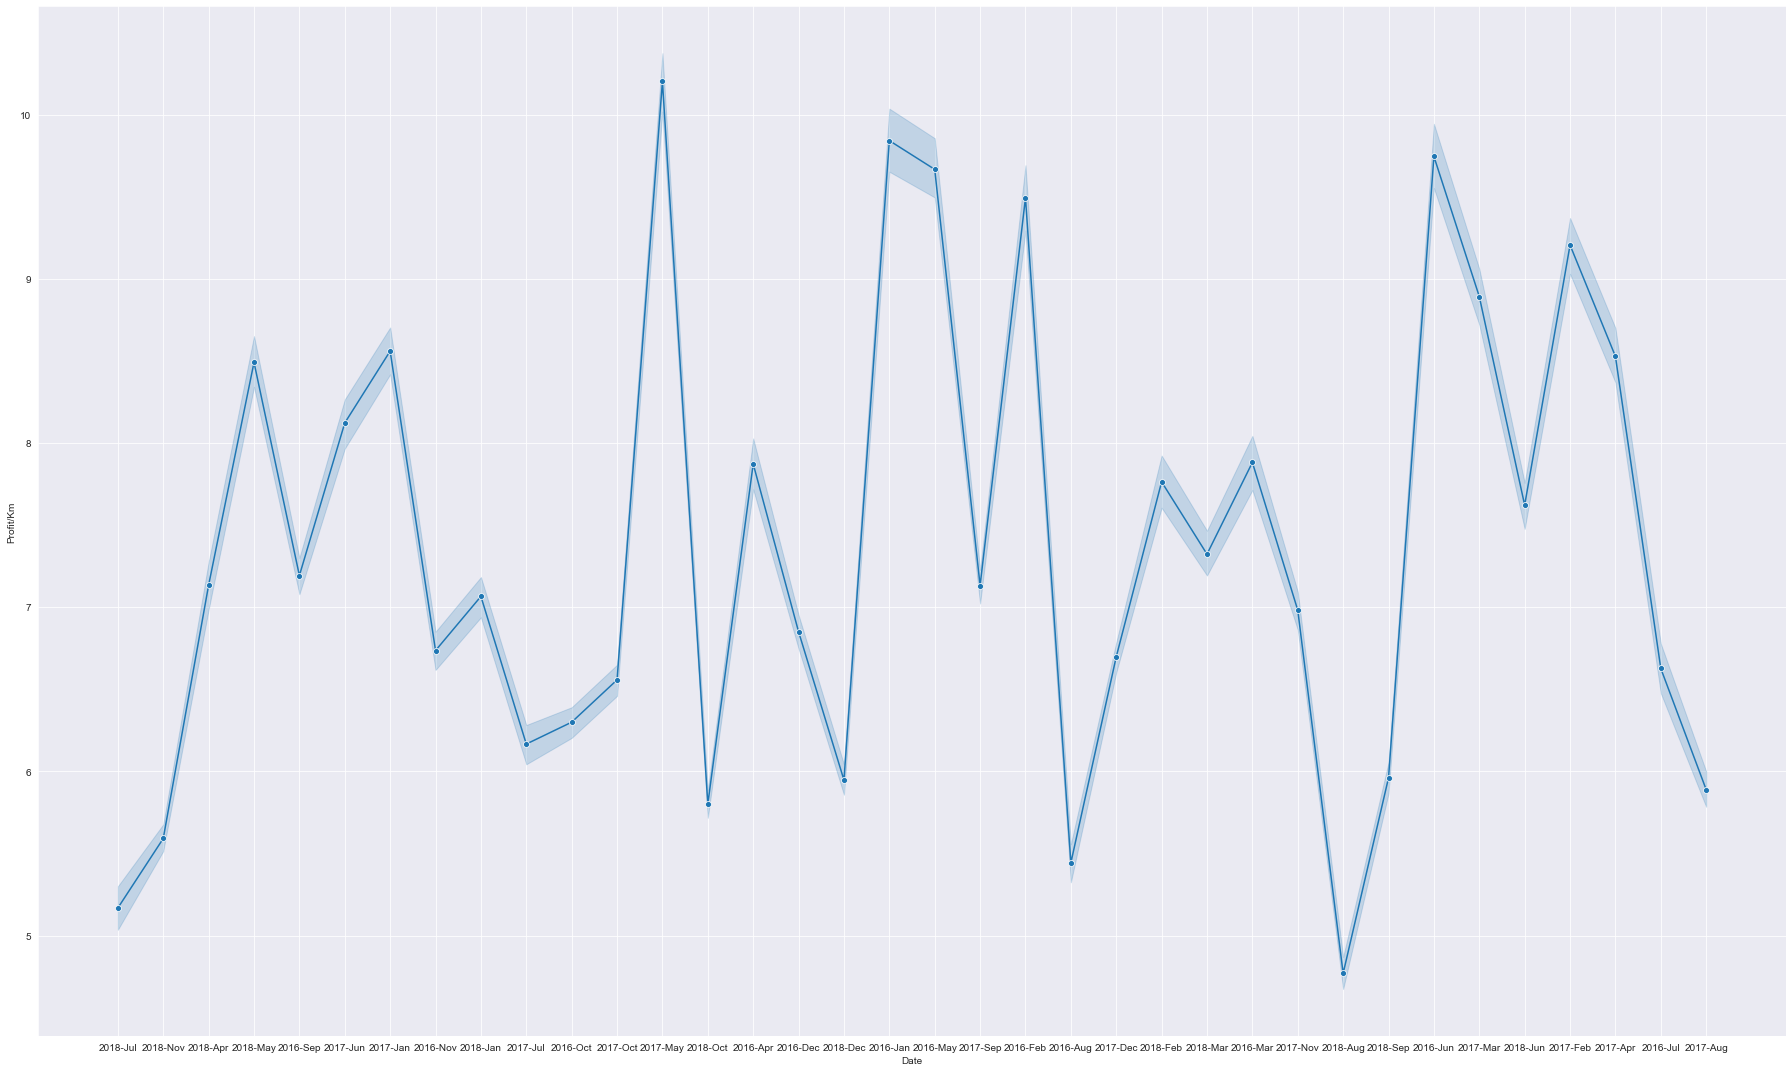

In [67]:
sns.set_style('darkgrid')

plt.figure(figsize=(25,15))

sns.lineplot(data=yellow_cab, x="mdate", y=yellow_cab["Profit/Km"],  marker='o')

plt.xlabel('Date')

plt.show

plt.tight_layout();

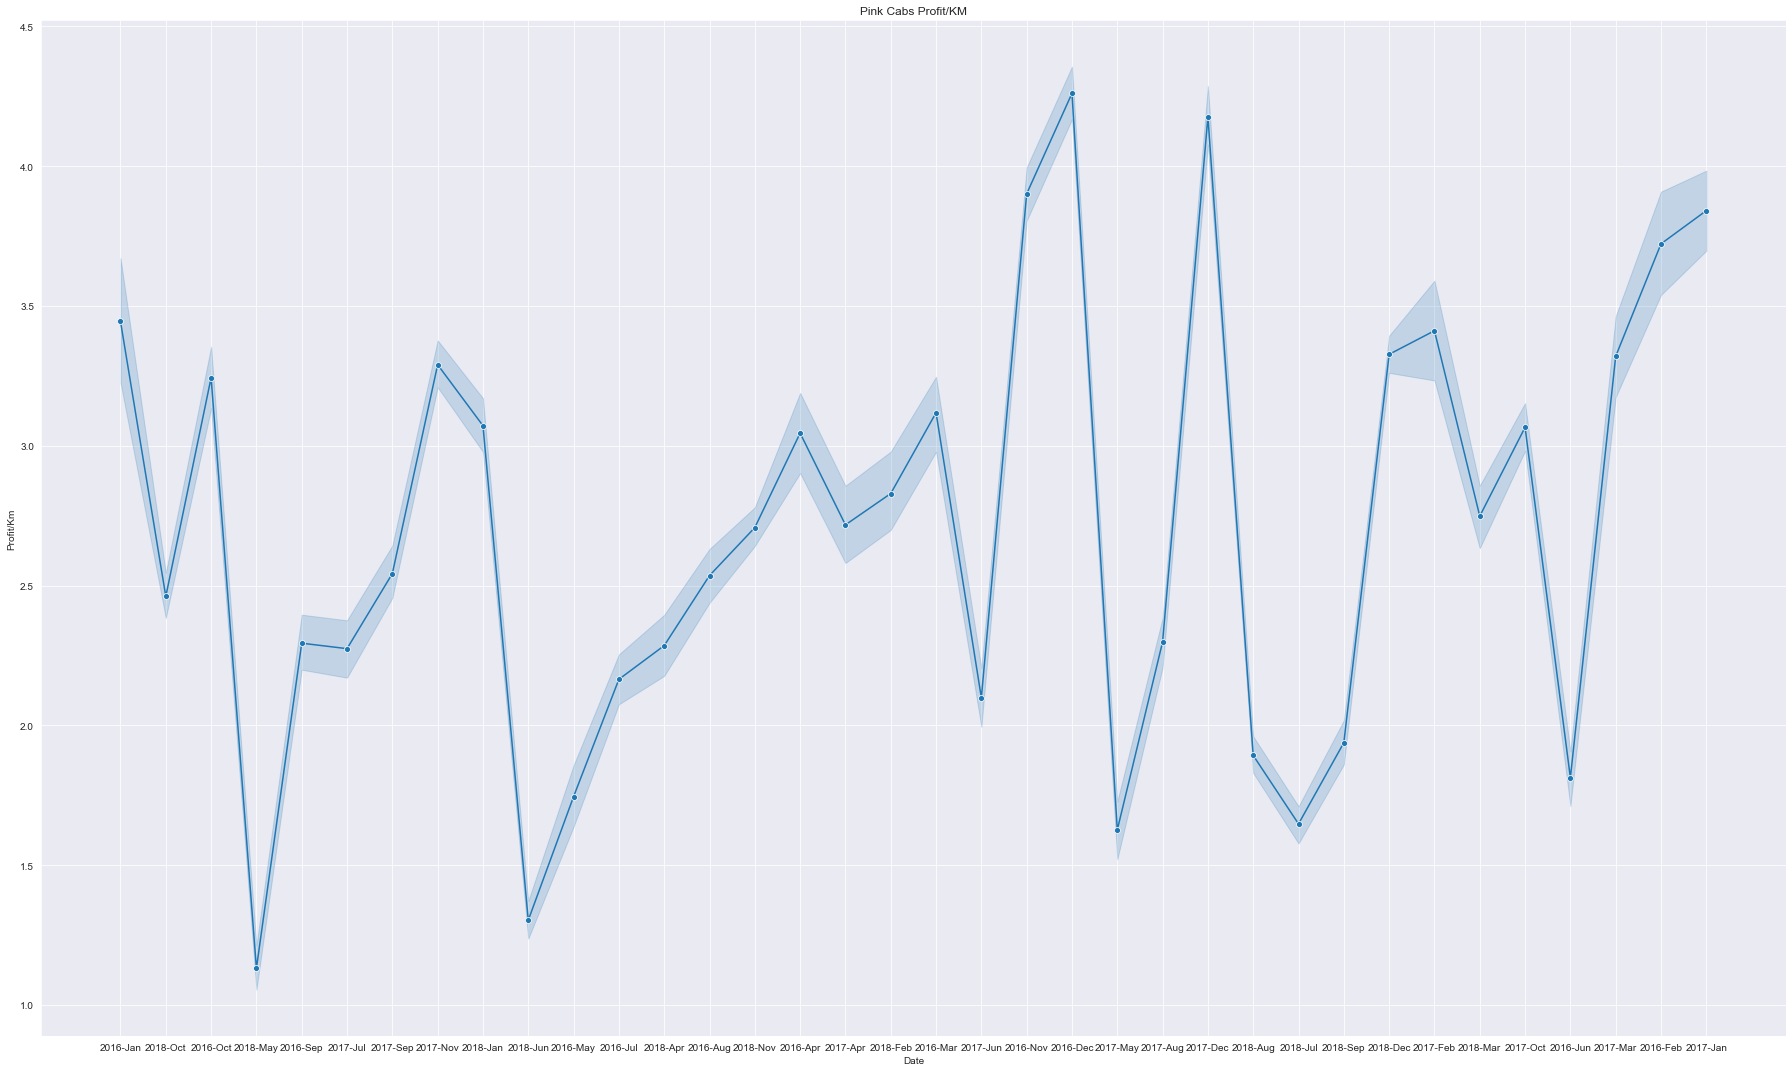

In [68]:
sns.set_style('darkgrid')

plt.figure(figsize=(25,15))

sns.lineplot(data=pink_cab, x="mdate", y=pink_cab["Profit/Km"],  marker='o')

plt.title('Pink Cabs Profit/KM')

plt.xlabel('Date')

plt.show

plt.tight_layout();

In [69]:
fin_analysis_group = fin_analysis.groupby(['Company','mdate'])['Profit/Km'].mean().reset_index()

fin_analysis_group = fin_analysis_group.sort_values(by=['mdate'],key=lambda row: pd.to_datetime(row,format='%Y-%b'))


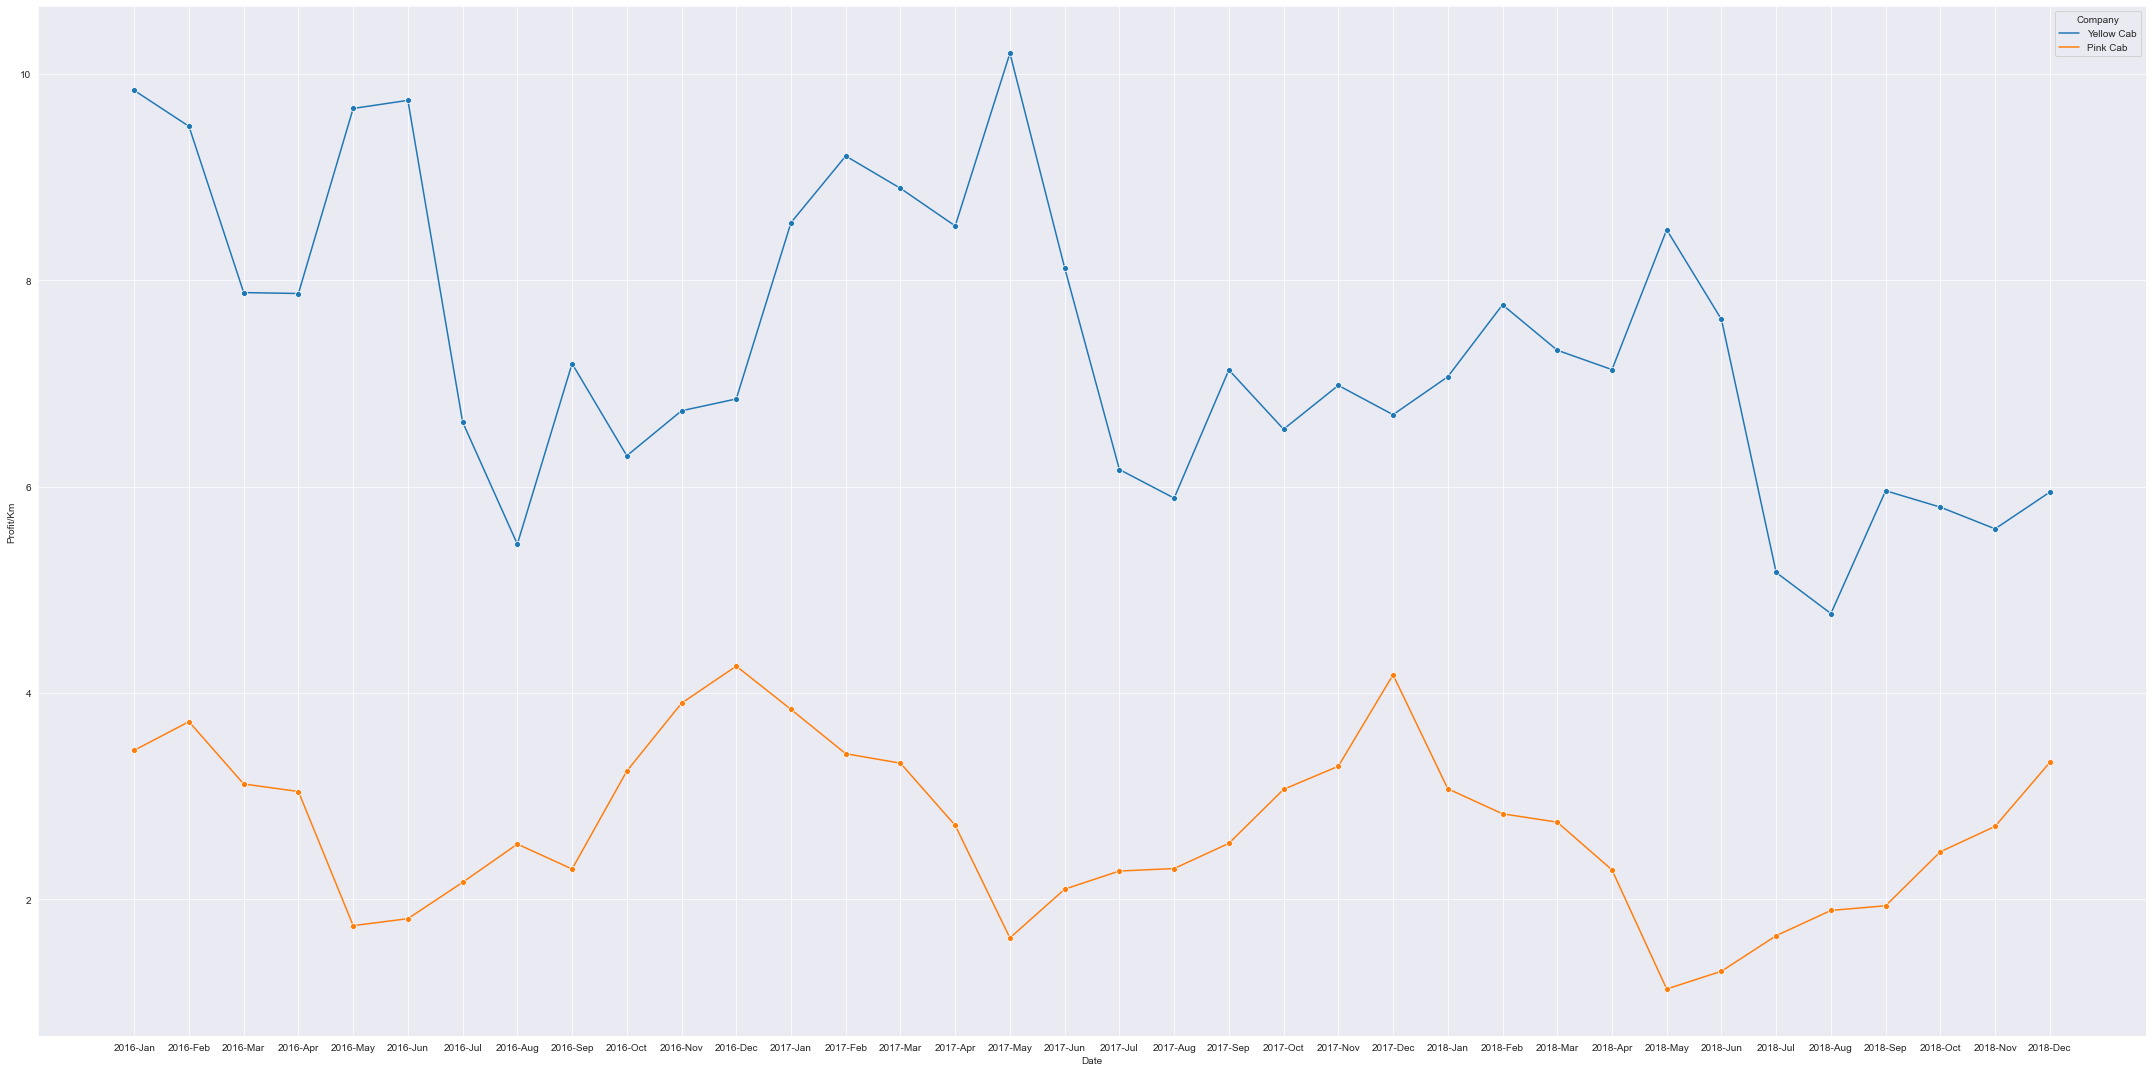

In [70]:
sns.set_style('darkgrid')

plt.figure(figsize=(30,15))

sns.lineplot(data=fin_analysis_group, x="mdate", y="Profit/Km", hue="Company",  marker='o')

plt.xlabel('Date')

plt.show

plt.tight_layout();

# MACHINE LEARNING

In [71]:
import statsmodels.api as sm 


In [72]:
plt.figure(figsize=[20,10])
sm.tsa.seasonal_decompose(full_data.resample("M").median().Profit/Km).plot()
plt.show()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

<Figure size 1440x720 with 0 Axes>